In [1]:
from synthetic.galaxy import add_galaxy

import os

import acalib
import acalib.io
import acalib.core.transform
import acalib.algorithms.stacking

import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import wcs

%matplotlib inline

from random import randint

import skimage

In [2]:
def random_trim(data):
    xx,yy = data.shape
    xi = randint(0,xx//4-1)
    xf = randint(xx*3//4,xx-1)
    yi = randint(0,yy//4-1)
    yf = randint(yy*3//4,yy-1)
    return data[xi:xf,yi:yf]

INFO: Processing PrimaryHDU Object 0 [acalib.io.fits]
INFO: 2D data detected: assuming RA-DEC [acalib.io.fits]


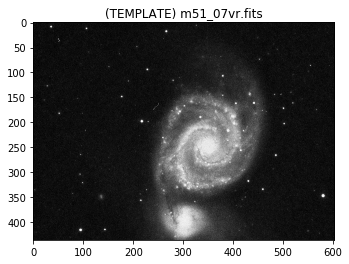

INFO: Processing PrimaryHDU Object 0 [acalib.io.fits]
INFO: 2D data detected: assuming RA-DEC [acalib.io.fits]


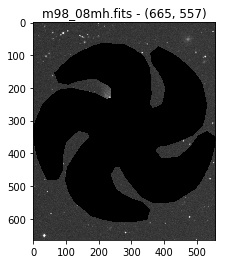

INFO: Processing PrimaryHDU Object 0 [acalib.io.fits]
INFO: 2D data detected: assuming RA-DEC [acalib.io.fits]


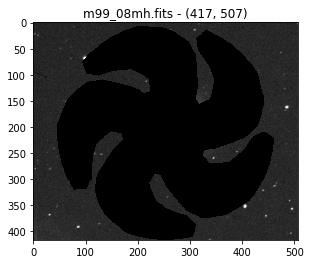

INFO: Processing PrimaryHDU Object 0 [acalib.io.fits]
INFO: 2D data detected: assuming RA-DEC [acalib.io.fits]


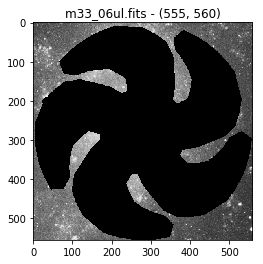

INFO: Processing PrimaryHDU Object 0 [acalib.io.fits]
INFO: 2D data detected: assuming RA-DEC [acalib.io.fits]


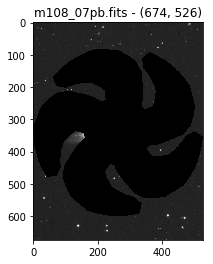

INFO: Processing PrimaryHDU Object 0 [acalib.io.fits]
INFO: 2D data detected: assuming RA-DEC [acalib.io.fits]


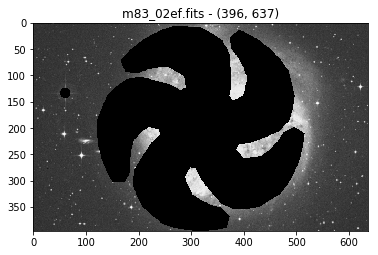

INFO: Processing PrimaryHDU Object 0 [acalib.io.fits]
INFO: 2D data detected: assuming RA-DEC [acalib.io.fits]


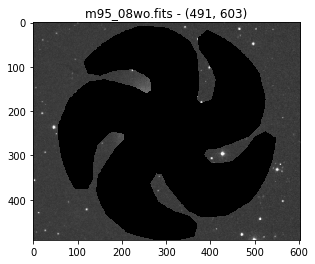

INFO: Processing PrimaryHDU Object 0 [acalib.io.fits]
INFO: 2D data detected: assuming RA-DEC [acalib.io.fits]


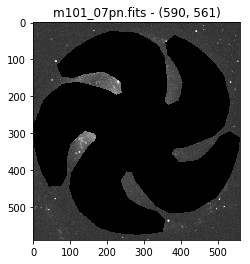

INFO: Processing PrimaryHDU Object 0 [acalib.io.fits]
INFO: 2D data detected: assuming RA-DEC [acalib.io.fits]


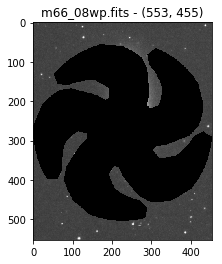

INFO: Processing PrimaryHDU Object 0 [acalib.io.fits]
INFO: 2D data detected: assuming RA-DEC [acalib.io.fits]


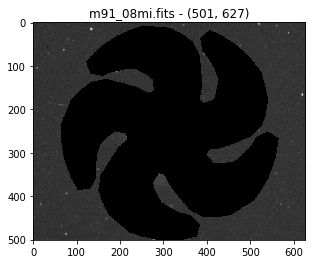

INFO: Processing PrimaryHDU Object 0 [acalib.io.fits]
INFO: 2D data detected: assuming RA-DEC [acalib.io.fits]


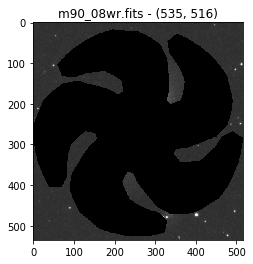

INFO: Processing PrimaryHDU Object 0 [acalib.io.fits]
INFO: 2D data detected: assuming RA-DEC [acalib.io.fits]


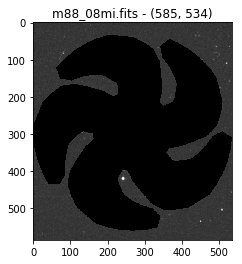

INFO: Processing PrimaryHDU Object 0 [acalib.io.fits]
INFO: 2D data detected: assuming RA-DEC [acalib.io.fits]


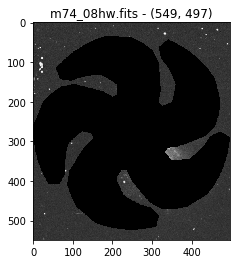

INFO: Processing PrimaryHDU Object 0 [acalib.io.fits]
INFO: 2D data detected: assuming RA-DEC [acalib.io.fits]


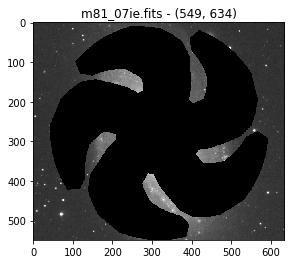

INFO: Processing PrimaryHDU Object 0 [acalib.io.fits]
INFO: 2D data detected: assuming RA-DEC [acalib.io.fits]


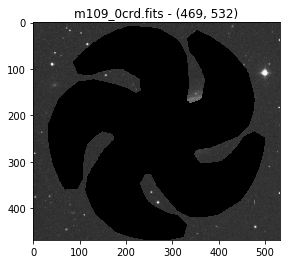

INFO: Processing PrimaryHDU Object 0 [acalib.io.fits]
INFO: 2D data detected: assuming RA-DEC [acalib.io.fits]


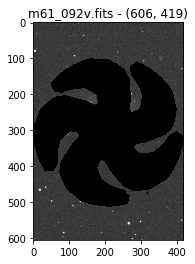

INFO: Processing PrimaryHDU Object 0 [acalib.io.fits]
INFO: 2D data detected: assuming RA-DEC [acalib.io.fits]


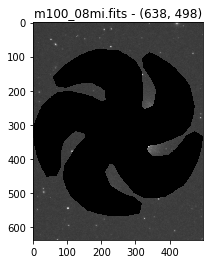

INFO: Processing PrimaryHDU Object 0 [acalib.io.fits]
INFO: 2D data detected: assuming RA-DEC [acalib.io.fits]


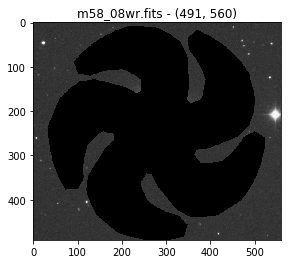

In [8]:
# Parameters:
trim = True # randomly cut the images.
template_index = 4 # index of the template image
directory = "spiral" #ellipti or spiral

# Create container of spiral galaxies:
files = os.listdir(directory)
fname = os.path.join(directory,files[template_index])
template = acalib.io.loadFITS_PrimaryOnly(fname).data
if trim: template = random_trim(template)
# Display template
plt.title("(TEMPLATE) "+files[template_index])
plt.imshow(template,cmap='gray')
plt.show()

# Collect and display images:
images = []
for k in range(len(files)):
    if k==template_index: continue
    d = files[k]
    fname = os.path.join(directory,d)
    cube = acalib.io.loadFITS_PrimaryOnly(fname).data
    if trim: cube = random_trim(cube)
    images.append(cube)
    # Display, also  the centroid:
    cube_w_centroid = np.copy(cube)
    props = acalib.core.transform.fits_props(cube_w_centroid)
    rr, cc = skimage.draw.circle(props['centroid'][0],props['centroid'][1],10,
                                 cube_w_centroid.shape)
    cube_w_centroid[rr,cc] = 0
    plt.title(d+" - "+str(cube_w_centroid.shape))
    add_galaxy(cube_w_centroid,arms=5)
    plt.imshow(cube_w_centroid,cmap='gray')
    plt.show()

         215589 function calls (168755 primitive calls) in 9.883 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
       34    0.000    0.000    0.000    0.000 <frozen importlib._bootstrap>:989(_handle_fromlist)
        1    0.013    0.013    9.883    9.883 <string>:1(<module>)
       54    0.000    0.000    0.000    0.000 _clear_border.py:46(<genexpr>)
       18    0.029    0.002    0.146    0.008 _clear_border.py:5(clear_border)
       18    0.000    0.000    0.000    0.000 _clear_border.py:54(<listcomp>)
      170    0.005    0.000    0.007    0.000 _geometric.py:1074(__init__)
      646    0.000    0.000    0.000    0.000 _geometric.py:1076(<genexpr>)
       68    0.004    0.000    0.016    0.000 _geometric.py:18(_center_and_normalize_points)
       34    0.006    0.000    0.050    0.001 _geometric.py:591(estimate)
       68    0.000    0.000    0.002    0.000 _geometric.py:694(__add__)
       34    0.000    0.000    0.0

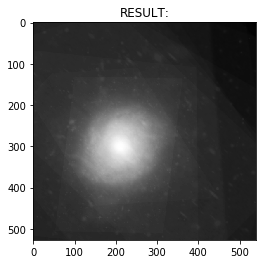

In [4]:
import cProfile
sta = acalib.algorithms.stacking.Stacking()
cProfile.run('sta.run(template,images)')
result = sta.run(template,images)
# Display result
plt.title("RESULT:")
plt.imshow(result,cmap='gray')
plt.show()